# Lesson 3

In [1]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Question 1

secInJune=30*24*60*60
print(secInJune)

secBetween=(73*24*60*60)+(21*60*60)+(30*60)
print(secBetween)

2592000
6384600


In [53]:
import pandas
#Question 2:
worldPop=Table.read_table('world_population.csv')

#Part A:
population_2015=worldPop.item(65)
print(population_2015)

#Part B:
gRate=((worldPop.column(0).item(65))/(worldPop.column(0).item(0)))
popGrowth=str(round(100*(gRate-1),2))+'%'
print(popGrowth)

#Part C:
avgRate=gRate**(1/worldPop.num_rows)
avgRate1=str(round(100*(avgRate-1),2))+'%'
print(avgRate1)

Population
7256490011
183.72%
1.59%


PassengerId,Survived,Passenger_Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


PassengerId,Survived,Passenger_Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


Passenger_Class,Survived,Survivor_Quantity,Initial_Passengers,Survival_Rate
1,1,136,216,0.62963
2,1,87,184,0.472826
3,1,119,491,0.242363


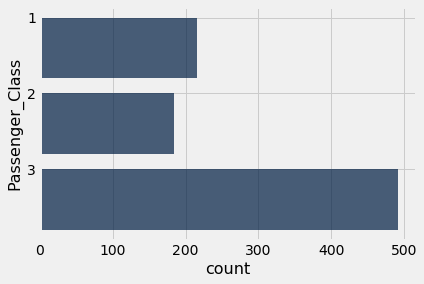

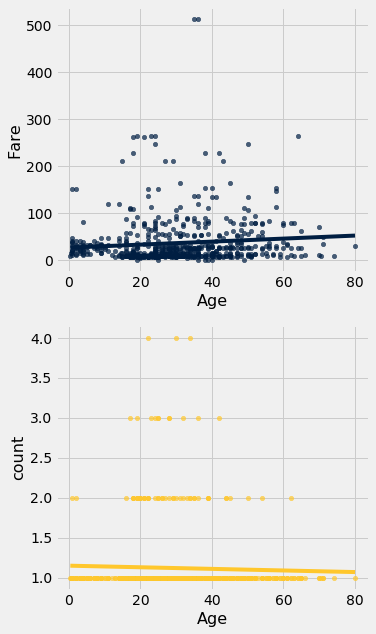

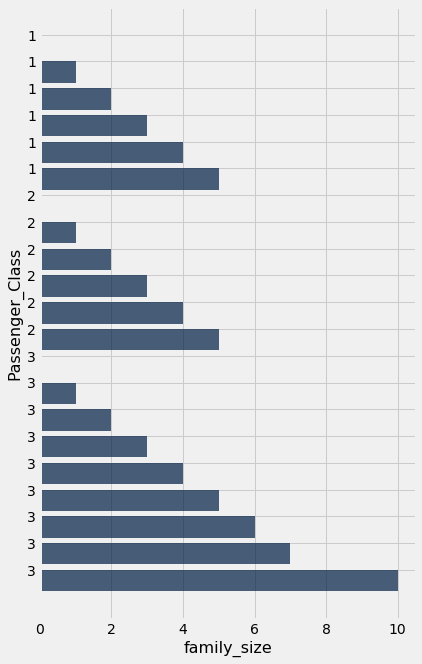

In [2]:
#Question 3

titanic=Table.read_table('train.csv')

#Part A:
titanic=titanic.relabeled('Pclass','Passenger_Class')

#Part B:
titanic=titanic.with_columns(
        'family_size',titanic.column('SibSp')+titanic.column('Parch')
)

#Part C:
passByClass=titanic.group('Passenger_Class')
passByClass.barh('Passenger_Class')

#Part D:
byYoungest=titanic.sort('Age',descending=False).show(5)

#Part E:
byOldest=titanic.sort('Age',descending=True).where('Age',are.between(-1,999)).show(5)

#Part F:
surviveByClass=titanic.groups(['Passenger_Class','Survived'])
numAlive=surviveByClass.where('Survived',are.equal_to(1))
numAlive=numAlive.with_column('Initial_Passengers',passByClass.column('count'))
numAlive=numAlive.relabeled('count','Survivor_Quantity')
numAlive=numAlive.with_column('Survival_Rate',numAlive.column('Survivor_Quantity')/numAlive.column('Initial_Passengers'))
display(numAlive)

#Part G: Create two of my own questions
#-----Question 1: Create a scatterplot of fare and age. Does there appear to be any correlation?
fareAge=titanic.groups(['Fare','Age']).where('Age',are.between(-1,999))
fareAge.scatter('Age',overlay=False,fit_line=True)

# Based on the first table generated and the subsequently generated trendline, there appears to be a 
# very weak/insignificant positive correleation between age and fare


#-----Question 2: Create a histogram comparison of travel class and family size. What do you observe?
fareClass=titanic.groups(['Passenger_Class','family_size'])
fareClass.select('Passenger_Class','family_size').barh('Passenger_Class')

# Based on the histogram generated, we can observe that there appears to be a similar distribution in travel size
# among first and second class passengers, while third class passengers traveled in larger family groups on average.